<a href="https://colab.research.google.com/github/nour-houda-melkii/Machine-Learning-Project/blob/data_understandig%26data_preparation/ML_avanc%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crisp-DM by **DataVerse**| prediction des nombres des vélos loués par heure

In [2]:
"""cellule pour les importations des bibliothèques"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

***Business understandig***

bo1: prévoir les heures de forte affluence pour mieux adapter l'offre aux besoins  

bo2: identifier les periodes creuses afin d'optimiser la redistribustion ou la maintenance

bo3:Evaluer les tendances saisonnières  

bo4:Analyser l’impact de la météo

bo5:Différencier le comportement des utilisateurs

bo6:Anticiper la demande future par heure



  
DSO1 : Construire un modèle prédictif capable d’identifier les heures avec un cnt élevé , en utilisant les variables temporelles (hr, weekday, workingday) et contextuelles (season, weathersit).


DSO2 : Détecter les intervalles horaires avec une faible demande (cnt bas) en exploitant des analyses statistiques (moyenne, médiane, seuils) et visualisations temporelles.


DSO3 : Analyser l’évolution de la demande (cnt) en fonction de la variable season afin de mettre en évidence les variations entre printemps, été, automne et hiver.


DSO4 : Étudier la corrélation entre la demande (cnt) et les variables météo (weathersit, temp, atemp, hum, windspeed) pour quantifier leur influence sur les locations.


DSO5 : Comparer les patterns d’utilisation entre casual et registered selon les dimensions temporelles (heure, jour, saison) et les conditions météo.



DSO6 :Développer un modèle de Machine Learning pour prédire cnt  à une heure donnée, en intégrant les variables temporelles, météo et contextuelles.


***Data understandig***

Saving datahour.csv to datahour (1).csv
(17484, 17)


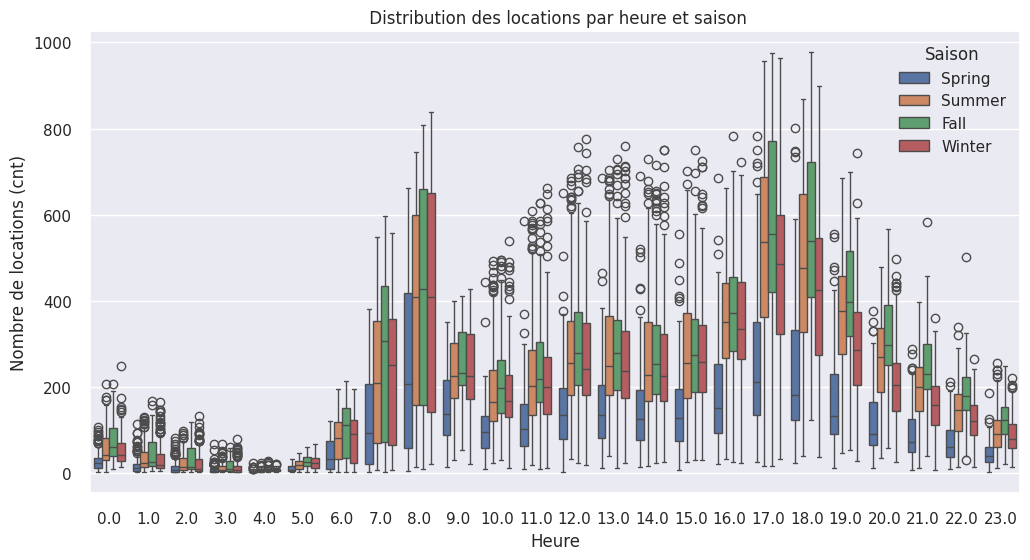

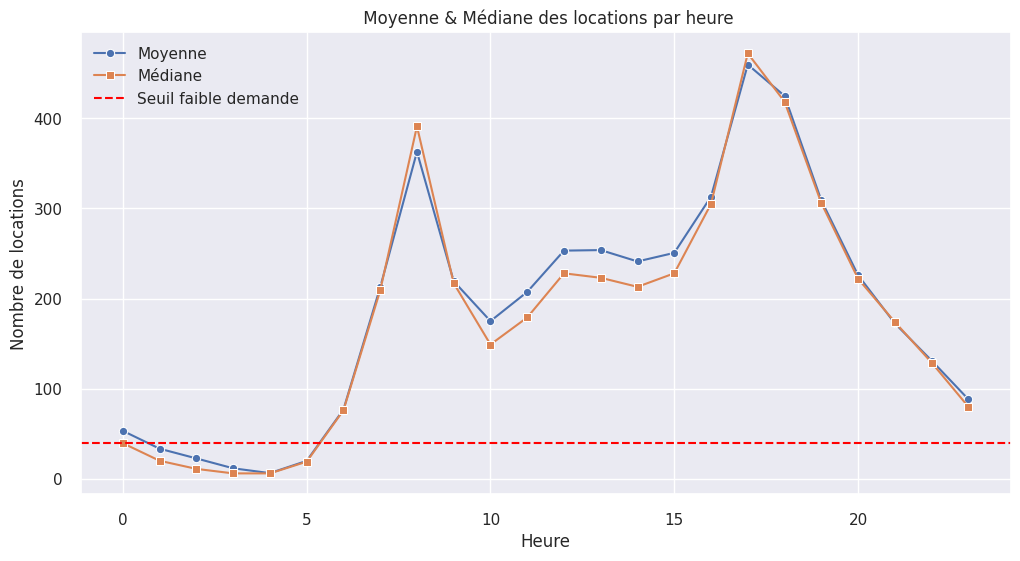

/tmp/ipython-input-110255272.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_stats, x="season", y="cnt", palette="coolwarm")


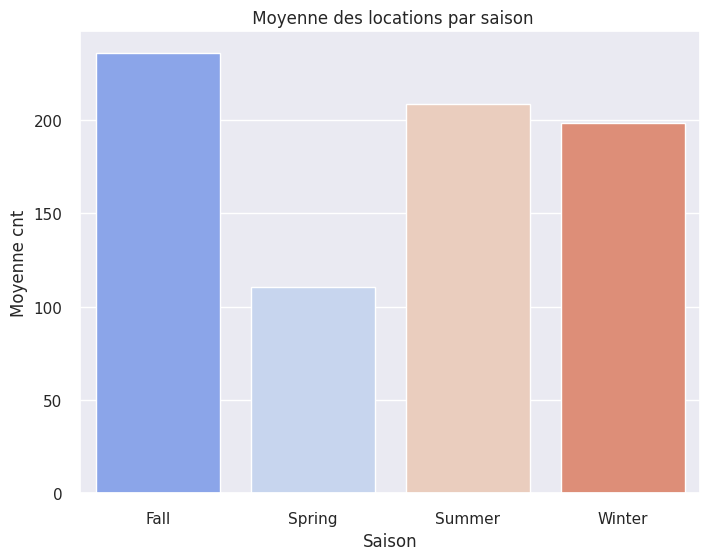

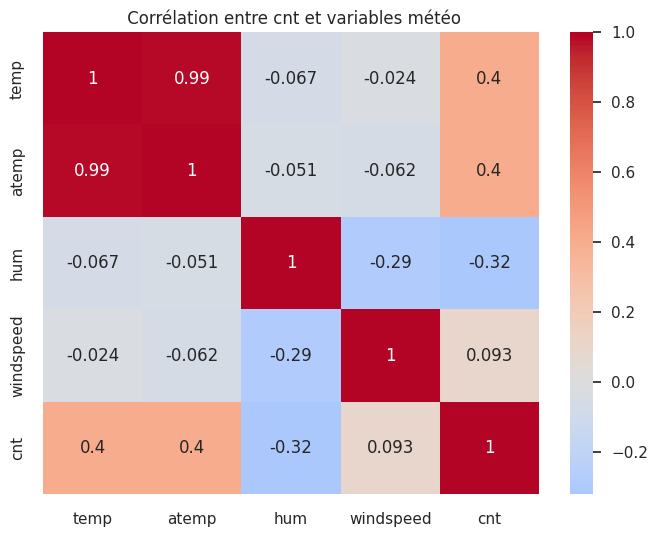

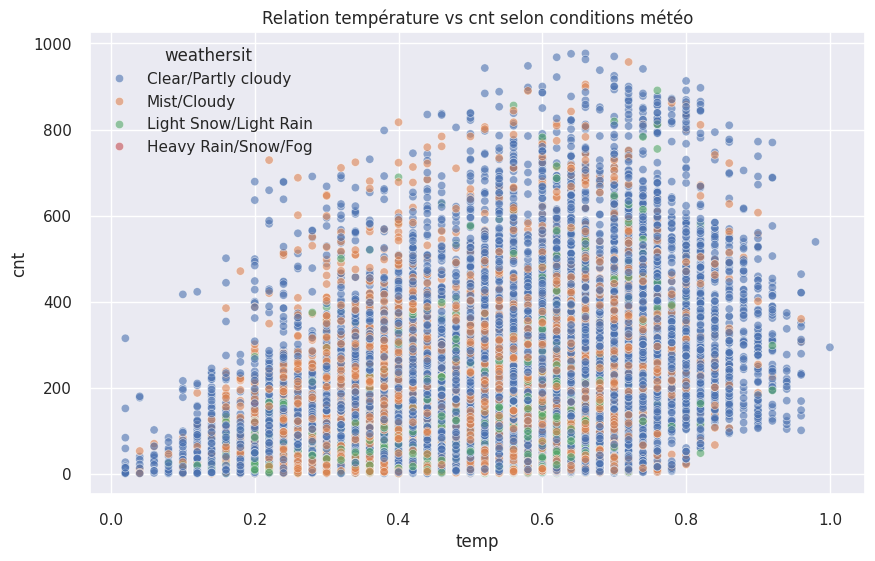

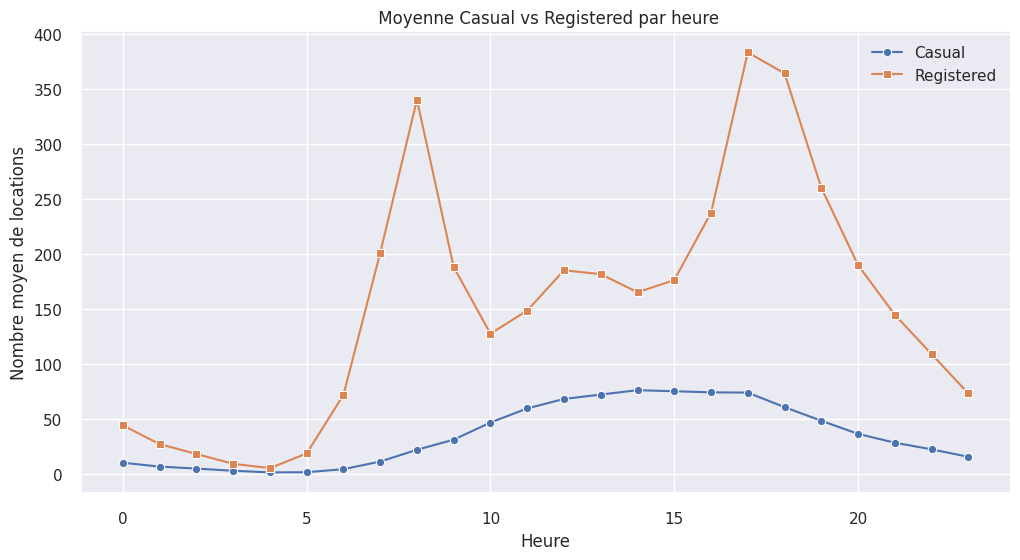

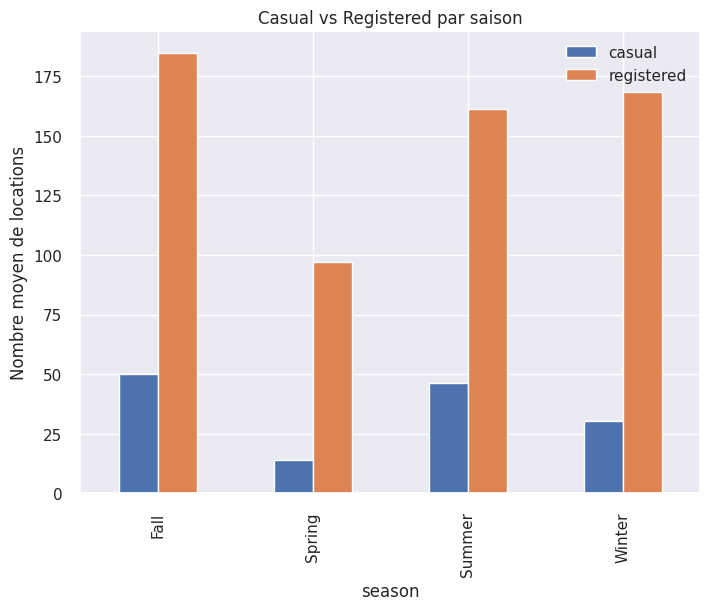

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-v0_8")
sns.set_theme()




from google.colab import files
uploaded = files.upload()

df = pd.read_csv("datahour.csv")

# Aperçu
print(df.shape)
df.head()

# ==============================

df["dteday"] = pd.to_datetime(df["dteday"])

# Mapping des variables catégorielles
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_map = {
    1: "Clear/Partly cloudy",
    2: "Mist/Cloudy",
    3: "Light Snow/Light Rain",
    4: "Heavy Rain/Snow/Fog"
}
weekday_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

df["season"] = df["season"].map(season_map)
df["weathersit"] = df["weathersit"].map(weather_map)
df["weekday"] = df["weekday"].map(weekday_map)

# ==============================
# DSO1 : Heures avec cnt élevé
# ==============================

high_threshold = df["cnt"].quantile(0.75)
df["high_demand"] = (df["cnt"] >= high_threshold).astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="hr", y="cnt", hue="season")
plt.title(" Distribution des locations par heure et saison")
plt.xlabel("Heure")
plt.ylabel("Nombre de locations (cnt)")
plt.legend(title="Saison")
plt.show()

# ==============================
# DSO2 : Intervalles horaires avec cnt bas
# ==============================

low_threshold = df["cnt"].quantile(0.25)
df["low_demand"] = (df["cnt"] <= low_threshold).astype(int)

hourly_stats = df.groupby("hr")["cnt"].agg(["mean","median"]).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_stats, x="hr", y="mean", marker="o", label="Moyenne")
sns.lineplot(data=hourly_stats, x="hr", y="median", marker="s", label="Médiane")
plt.axhline(low_threshold, color="red", linestyle="--", label="Seuil faible demande")
plt.title(" Moyenne & Médiane des locations par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de locations")
plt.legend()
plt.show()

# ==============================
# DSO3 : Demande selon la saison
# ==============================

season_stats = df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=season_stats, x="season", y="cnt", palette="coolwarm")
plt.title(" Moyenne des locations par saison")
plt.xlabel("Saison")
plt.ylabel("Moyenne cnt")
plt.show()

# ==============================
# DSO4 : Corrélation avec météo
# ==============================

weather_vars = ["temp","atemp","hum","windspeed","cnt"]

plt.figure(figsize=(8,6))
sns.heatmap(df[weather_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title(" Corrélation entre cnt et variables météo")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="temp", y="cnt", hue="weathersit", alpha=0.6)
plt.title("Relation température vs cnt selon conditions météo")
plt.show()

# ==============================
# DSO5 : Casual vs Registered
# ==============================

# Par heure
hourly_casual_reg = df.groupby("hr")[["casual","registered"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_casual_reg, x="hr", y="casual", label="Casual", marker="o")
sns.lineplot(data=hourly_casual_reg, x="hr", y="registered", label="Registered", marker="s")
plt.title(" Moyenne Casual vs Registered par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre moyen de locations")
plt.legend()
plt.show()

# Par saison
season_casual_reg = df.groupby("season")[["casual","registered"]].mean().reset_index()

season_casual_reg.set_index("season").plot(kind="bar", figsize=(8,6))
plt.title("Casual vs Registered par saison")
plt.ylabel("Nombre moyen de locations")
plt.show()


                    **Rapport de Data Visualisation**

 DSO1 : Déterminer les heures présentant un nombre élevé de cnt

Représentation :Boxplot du nombre de locations par heure et par saison.
Formation : Vous avez été formé sur des données jusqu'à octobre 2023. L'affluence est considérablement plus importante en fin de journée (17h-19h), particulièrement durant l'été et l'automne, ce qui coïncide avec les déplacements domicile-travail.


DSO2 : Identifier les créneaux horaires à faible demande

Visualisation : Graphiques montrant la moyenne et la médiane des locations par heure, avec un seuil minimal en rouge.
Formation effectuée sur des données jusqu'à octobre 2023. La sollicitation est minimale durant la nuit (0h-6h) puis augmente considérablement dès le matin, signalant des moments propices pour l'entretien ou la réorganisation des vélos.

 DSO3 : Étude de la demande en fonction de la saison.

Visualisation : Diagramme en barres(Barplot) représentant la moyenne des locations selon les saisons.
Interprétation :  L'usage atteint son point culminant pendant l'été, puis descend durant l'automne, tandis qu'il connaît une forte baisse en hiver, ce qui souligne l'influence de la météo saisonnière.

 DSO4 : Lien entre la demande et les facteurs météorologiques

Visualisation 1 :Heatmap des corrélations entre cnt et variables météo.
Interprétation :  Il existe une corrélation positive entre la demande et la température (temp, atemp) tandis qu'une corrélation négative est observée avec l'humidité et la vitesse du vent (hum, windspeed).

Visualisation 2 :Nuage de points cnt vs temp avec conditions météo.
Interprétation :  Les jours ensoleillés ou partiellement nuageux sont liés à une augmentation de la demande, alors que la pluie et la neige entraînent une nette diminution des réservations.

DSO5 : Comparer les patterns d’utilisation entre casual et registered

Visualisation 1 : Courbes de casual et registered par heure.
Interprétation :
Les utilisateurs enregistrés utilisent principalement les vélos aux heures de pointe (matin et soir), tandis que les casual privilégient les après-midis et week-ends.

Visualisation 2 : Histogramme casual vs registered par saison.
Interprétation :
 Les casual sont plus nombreux en été, reflétant un usage récréatif, alors que les registered maintiennent une demande stable même hors saison, traduisant un usage plus régulier.

In [4]:
#Chargement des données
df=pd.read_csv('datahour.csv')

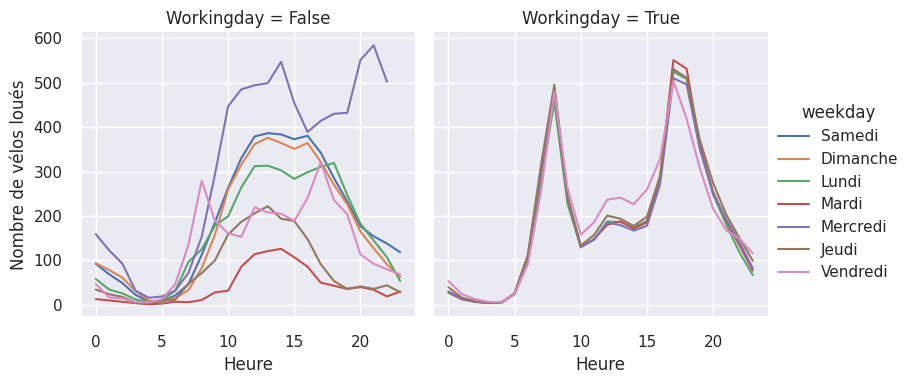

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# dictionnaire de mapping weekday
weekday_map = {
    0.0: "Dimanche",
    1.0: "Lundi",
    2.0: "Mardi",
    3.0: "Mercredi",
    4.0: "Jeudi",
    5.0: "Vendredi",
    6.0: "Samedi"
}

# mapping workingday
workingday_map = {0.0: False, 1.0: True}

# Appliquer les mappings
df["weekday"] = df["weekday"].map(weekday_map)
df["workingday"] = df["workingday"].map(workingday_map)

# Filtrer : éliminer Samedi & Dimanche quand workingday == True
df_filtered = df[~((df["workingday"] == True) & (df["weekday"].isin(["Samedi", "Dimanche"])))]

# FacetGrid
g = sns.FacetGrid(
    df_filtered,
    col="workingday",      # False = weekend, True = jour ouvrable
    hue="weekday",         # couleur par jour
    col_wrap=2,
    height=4
)

g.map_dataframe(sns.lineplot, x="hr", y="cnt", errorbar=None).add_legend()
g.set_axis_labels("Heure", "Nombre de vélos loués")
g.set_titles("Workingday = {col_name}")
sns.despine()
plt.show()


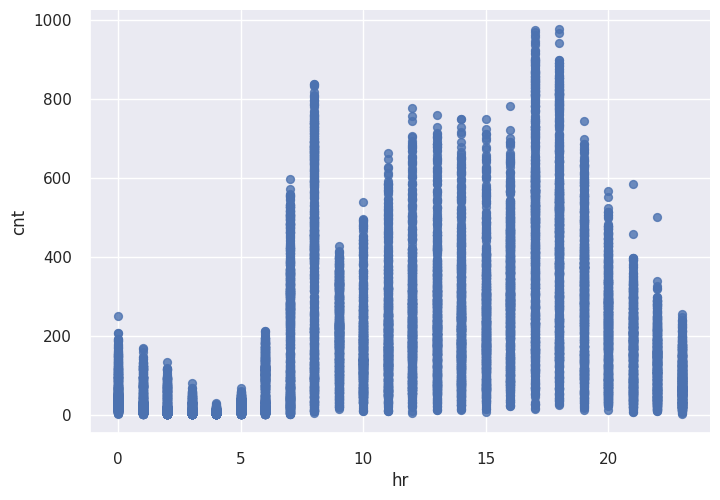

In [6]:
df.plot(kind='scatter', x='hr', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


***Data preparation***

In [7]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,Samedi,False,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,Samedi,NaN,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,Samedi,False,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,Samedi,False,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,Samedi,False,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479,10799.0,2012-03-31,2.0,1.0,3.0,1.0,0.0,Samedi,False,2.0,0.40,0.4091,0.76,0.1940,17.0,65.0,82.0
17480,8080.0,2011-12-08,4.0,0.0,12.0,7.0,0.0,Jeudi,True,1.0,0.22,0.2121,0.60,0.2239,11.0,233.0,244.0
17481,4055.0,2011-06-22,3.0,0.0,6.0,20.0,0.0,Mercredi,True,1.0,0.74,0.7121,0.74,0.1343,NaN,230.0,282.0
17482,NaN,2012-08-15,NaN,1.0,8.0,16.0,0.0,Mercredi,True,1.0,0.76,0.6818,0.48,0.1940,91.0,340.0,431.0


In [8]:
#traiter les valeurs manquantes
print(df.isnull().sum())
#pourcentage des valeurs manquantes
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


instant       353
dteday        376
season        381
yr            343
mnth          333
hr            364
holiday       358
weekday       354
workingday    345
weathersit    354
temp          332
atemp         366
hum           315
windspeed     338
casual        357
registered    316
cnt           355
dtype: int64
instant       2.018989
dteday        2.150538
season        2.179135
yr            1.961794
mnth          1.904598
hr            2.081903
holiday       2.047586
weekday       2.024708
workingday    1.973233
weathersit    2.024708
temp          1.898879
atemp         2.093342
hum           1.801647
windspeed     1.933196
casual        2.041867
registered    1.807367
cnt           2.030428
dtype: float64


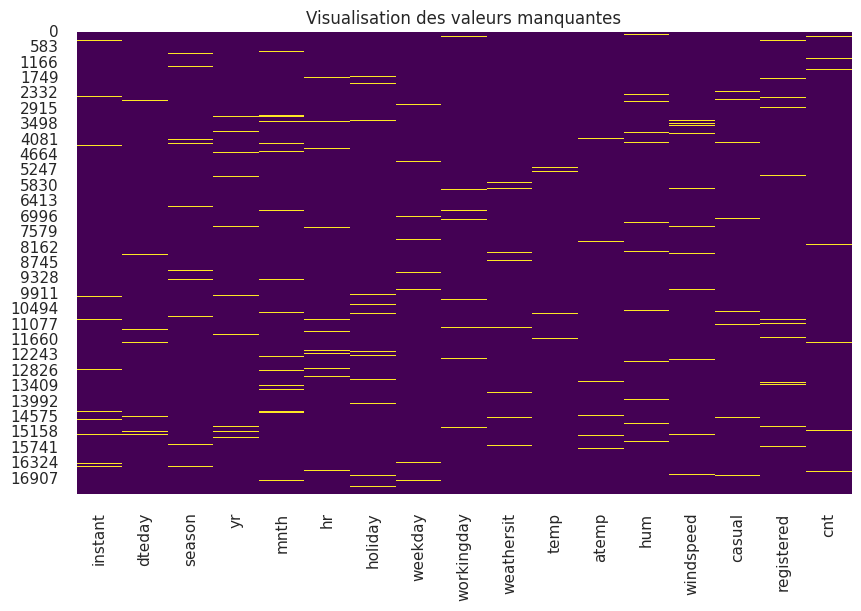

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#affichage avec heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()


In [10]:
#remplacement des valeurs manquantes
# Pour les colonnes numériques : remplissage par la médiane
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Pour les colonnes catégorielles : remplissage par le mode
cat_cols = df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Pour les colonnes de dates : interpolation
if 'dteday' in df.columns:
    df['dteday'] = df['dteday'].interpolate()


/tmp/ipython-input-2210815228.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/tmp/ipython-input-2210815228.py:13: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['dteday'] = df['dteday'].interpolate()


In [11]:
print(df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
print(df.dtypes)

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday        object
workingday       bool
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object


In [13]:
# Colonnes numériques (à standardiser/normaliser)
num_cols = [
    'instant', 'season', 'yr', 'mnth', 'hr',
    'holiday', 'weathersit', 'temp', 'atemp',
    'hum', 'windspeed', 'casual', 'registered', 'cnt'
]

# Standardisation (moyenne = 0, écart-type = 1)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler_standard.fit_transform(df[num_cols])

# Normalisation (entre 0 et 1)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = scaler_minmax.fit_transform(df[num_cols])

print("Standardized:")
print(df_standardized[num_cols].head())

print("\nNormalized:")
print(df_normalized[num_cols].head())


Standardized:
    instant    season        yr      mnth        hr   holiday  weathersit  \
0 -1.748619 -1.381714 -1.025021 -1.629418 -1.688223 -0.170694   -0.655998   
1 -1.748418 -1.381714 -1.025021 -1.629418 -1.542240 -0.170694   -0.655998   
2 -1.748216 -1.381714 -1.025021 -1.629418 -1.396258 -0.170694   -0.655998   
3 -1.748015 -1.381714 -1.025021 -1.629418 -1.250276 -0.170694   -0.655998   
4 -1.747813 -1.381714 -1.025021 -1.629418 -1.104294 -0.170694   -0.655998   

       temp     atemp       hum  windspeed    casual  registered       cnt  
0 -1.349052 -1.107976  0.959384  -1.571734 -0.661192   -0.934367 -0.960676  
1 -1.453859 -1.197383  0.907007  -1.571734 -0.558663   -0.807315 -0.827000  
2 -1.453859 -1.197383  0.907007  -1.571734 -0.620180   -0.840750 -0.871559  
3 -1.349052 -1.107976  0.645124  -1.571734 -0.661192   -0.954428 -0.977386  
4 -1.349052 -1.107976  0.645124  -1.571734 -0.722709   -1.014610 -1.044224  

Normalized:
    instant  season   yr  mnth        hr  holida

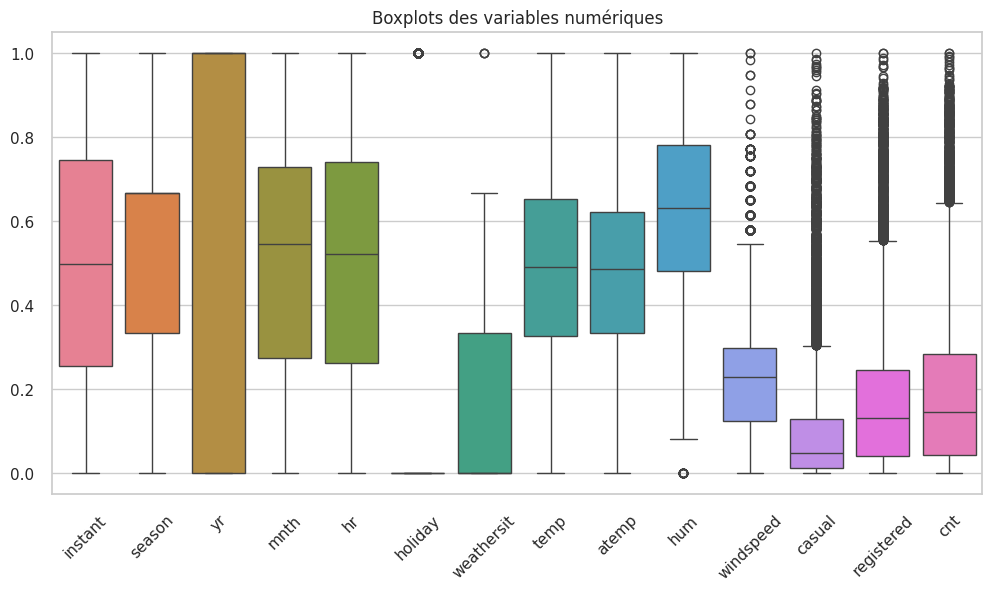

In [22]:
#traiter les valeurs aberrantes
# Liste des colonnes numériques
num_cols = df_normalized.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_normalized[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots des variables numériques")
plt.show()


In [14]:
# Colonnes numériques à vérifier
cols_num = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

def traiter_outliers_iqr(df, cols):
    """
    Détection et traitement des valeurs aberrantes par capping (IQR).
    - Remplace les valeurs < borne_inf par borne_inf
    - Remplace les valeurs > borne_sup par borne_sup
    """
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Appliquer le capping
        df_clean[col] = np.where(df[col] < borne_inf, borne_inf,
                          np.where(df[col] > borne_sup, borne_sup, df[col]))
    return df_clean

# Application du traitement
df_clean = traiter_outliers_iqr(df, cols_num)

# Vérification rapide
print("Avant traitement :")
print(df[cols_num].describe())
print("\nAprès traitement :")
print(df_clean[cols_num].describe())



Avant traitement :
               temp         atemp          hum     windspeed        casual  \
count  17484.000000  17484.000000  17484.00000  17484.000000  17484.000000   
mean       0.497434      0.476267      0.62683      0.190139     35.244109   
std        0.190832      0.170015      0.19093      0.120978     48.768058   
min        0.020000      0.000000      0.00000      0.000000      0.000000   
25%        0.340000      0.333300      0.48000      0.104500      4.000000   
50%        0.500000      0.484800      0.63000      0.194000     17.000000   
75%        0.660000      0.621200      0.78000      0.253700     47.000000   
max        1.000000      1.000000      1.00000      0.850700    367.000000   

         registered           cnt  
count  17484.000000  17484.000000  
mean     152.730096    188.477808  
std      149.549481    179.543014  
min        0.000000      1.000000  
25%       35.000000     42.000000  
50%      115.000000    142.000000  
75%      217.000000    277

In [16]:
# Vérifier le nombre de lignes initiales
print(f"Nombre de lignes initiales : {df.shape[0]}")

# 1. Nombre total de doublons
nb_duplicated = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nb_duplicated}")

# 2. Afficher un échantillon des doublons (si existants)
if nb_duplicated > 0:
    print("\nExemple de doublons détectés :")
    print(df[df.duplicated()].head())

# 3. Statistiques de base avant suppression
print("\nStatistiques avant suppression des doublons :")
print(df.describe())


Nombre de lignes initiales : 17484
Nombre de lignes dupliquées : 105

Exemple de doublons détectés :
       instant      dteday  season   yr  mnth    hr  holiday   weekday  \
17379   5607.0  2011-08-26     3.0  0.0   8.0  12.0      0.0  Vendredi   
17380   9369.0  2012-01-31     1.0  1.0   1.0   6.0      0.0     Mardi   
17381   4990.0  2011-07-31     3.0  0.0   7.0  19.0      0.0  Dimanche   
17382  16739.0  2012-12-05     4.0  1.0  12.0   5.0      0.0  Mercredi   
17383   3336.0  2011-05-23     2.0  0.0   5.0  21.0      0.0     Lundi   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17379        True         2.0  0.76  0.7273  0.66     0.1045    70.0   
17380        True         1.0  0.28  0.2727  0.52     0.1642     0.0   
17381       False         1.0  0.80  0.7576  0.55     0.3284    87.0   
17382        True         1.0  0.50  0.4848  0.59     0.2836     1.0   
17383        True         1.0  0.64  0.5758  0.89     0.2239    33.0   

       registered    

Nombre de lignes initiales : 17484
Nombre de doublons détectés : 105

Nombre de lignes après suppression : 17379
Nombre de doublons restants : 0


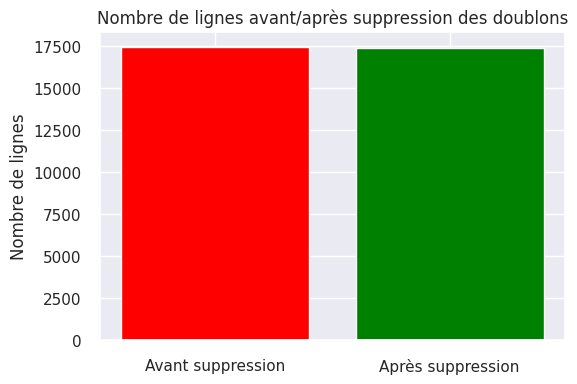

In [17]:

#Avant suppression
print(f"Nombre de lignes initiales : {df.shape[0]}")
print(f"Nombre de doublons détectés : {df.duplicated().sum()}")

#Suppression des doublons
df_no_dup = df.drop_duplicates(keep="first")

print(f"\nNombre de lignes après suppression : {df_no_dup.shape[0]}")
print(f"Nombre de doublons restants : {df_no_dup.duplicated().sum()}")

# Visualisation
plt.figure(figsize=(6,4))
counts = [df.shape[0], df_no_dup.shape[0]]
labels = ["Avant suppression", "Après suppression"]

plt.bar(labels, counts, color=["red", "green"])
plt.title("Nombre de lignes avant/après suppression des doublons")
plt.ylabel("Nombre de lignes")
plt.show()




***Modeling***

🔹 Méthodes supervisées (prédire cnt)
1. Régression Linéaire Multiple

Pourquoi ?

C’est une méthode simple et interprétable, idéale comme baseline.

Elle permet de voir rapidement l’effet de chaque variable (heure, météo, saison) sur cnt.

Utile pour expliquer les résultats à un public non technique.

Limite : elle ne capture pas bien les relations non linéaires (exemple : hausse soudaine de la demande à certaines heures).

2. Random Forest Regressor

Pourquoi ?

C’est un modèle robuste et performant pour les données tabulaires.

Il gère les relations non linéaires, les interactions complexes (exemple : effet combiné pluie + heure de pointe).

Il fournit aussi une mesure d’importance des variables → utile pour savoir si la météo ou l’heure est la plus influente.

Limite : un peu moins interprétable qu’une régression linéaire.

👉 Ces deux méthodes te donnent un équilibre :

Régression Linéaire → baseline claire et interprétable.

Random Forest → performance et robustesse.

🔹 Méthodes non supervisées (explorer les patterns)
1. K-Means Clustering

Pourquoi ?

Pour regrouper automatiquement les heures/jours selon la demande (cnt).

Par exemple :

Cluster 1 → heures creuses (nuit, matin tôt).

Cluster 2 → heures de pointe (trajets travail).

Cluster 3 → week-end / loisirs.

Très utile pour identifier des profils de comportements sans utiliser la variable cible.

Limite : il faut définir le nombre de clusters à l’avance (souvent avec la méthode du coude).

2. PCA (Analyse en Composantes Principales)

Pourquoi ?

Réduit la dimensionnalité des données météo (temp, atemp, hum, windspeed).

Permet de visualiser les relations complexes entre les variables sur 2D ou 3D.

Aide à voir si certaines conditions météo forment des schémas spécifiques de location.

Limite : c’est une méthode exploratoire, pas prédictive → mais très utile pour l’analyse visuelle et la compréhension.

✅ Résumé des choix conseillés
Supervisé :

Régression Linéaire Multiple (baseline, interprétation).

Random Forest (modèle avancé, performant).

Non supervisé :

K-Means (clustering des patterns d’utilisation).

PCA (visualisation et réduction de dimension).

***Evaluation***

***Depoloiement***